In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load metadata file: for this code, the metadata and the data file must be in a 2-column format: well|condition and well|OD, respectively
metadata = pd.read_csv('metadata_table.csv')
# load data file
data = pd.read_csv('data_table.csv')
# merge data and metadata
merged_data = pd.merge(data, metadata, on = 'well')


In [5]:
print(data)

    well     OD
0     A1  0.988
1     A2  0.985
2     A3  0.902
3     A4  0.956
4     A5  0.968
..   ...    ...
379  P20  0.157
380  P21  0.232
381  P22  0.194
382  P23  0.138
383  P24  0.152

[384 rows x 2 columns]


In [6]:
# remove well column
merged_data = merged_data.drop("well", axis=1)
merged_data = merged_data.sort_values(by='condition', ascending=False)
print(merged_data)

        OD condition
0    0.988      DMSO
252  0.449      DMSO
200  0.955      DMSO
201  0.984      DMSO
202  0.940      DMSO
..     ...       ...
222  0.135     Cipro
223  0.125     Cipro
224  0.129     Cipro
225  0.133     Cipro
383  0.152     Cipro

[384 rows x 2 columns]


In [7]:
# Group the merged_data DataFrame by 'Condition' and calculate both mean and standard deviation
# the .agg function calculates both mean and standard deviation
grouped_data = merged_data.groupby('condition').agg({'OD': ['mean', 'std']})

# Reset the index to make 'Condition' a column instead of an index
grouped_data.reset_index(inplace=True)

# Rename the columns for clarity
grouped_data.columns = ['condition', 'mean_OD', 'std_OD']

# Print the resulting DataFrame
print(grouped_data)

  condition   mean_OD    std_OD
0     Cipro  0.160781  0.050942
1      DMSO  0.707333  0.210812


In [8]:
# now calculate a z-score
# the .loc function extracts the value from the table at the crossing point of the descriptors
# the .iloc function lets you do the same, but based on integer row and column positions (e.g. 0, 3)
# df.iloc[row_position, column_position], keep in mind that the df is zero-indexed
mean_pos = grouped_data.iloc[1, 1]
mean_neg = grouped_data.iloc[0, 1]
std_pos = grouped_data.iloc[1, 2]
std_neg = grouped_data.iloc[0, 2]
z = 1 - (3*(std_pos+std_neg))/(mean_pos-mean_neg)
print(z)

-0.4367602435943141


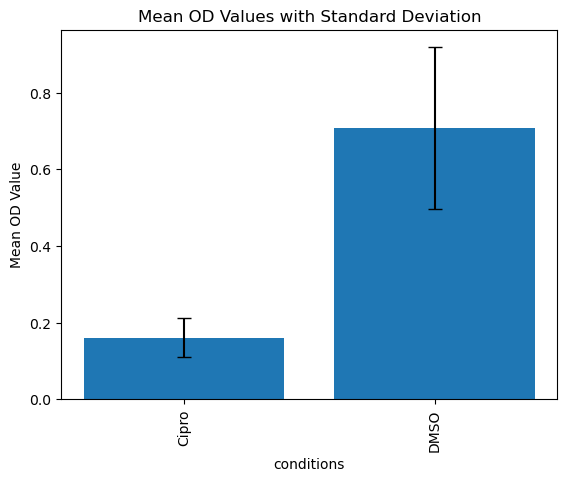

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the mean values
plt.bar(grouped_data['condition'], grouped_data['mean_OD'], yerr=grouped_data['std_OD'], capsize=5)
plt.xlabel('conditions')
plt.ylabel('Mean OD Value')
plt.title('Mean OD Values with Standard Deviation')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()
plt.savefig('average_OD_by_condition.png')

In [10]:
merged_data.to_csv('merged_data.csv', index=False)